In [0]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
# from sklearn import cross_validation, metrics   #Additional scklearn functions
pd.set_option('display.max_columns', 500)

In [82]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import os 
os.chdir('/content/gdrive/My Drive/Merilytics test')

In [0]:
df1= pd.read_csv('borrower_table.csv', encoding='latin1', error_bad_lines=False )

In [0]:
df2=pd.read_csv('loan_table.csv', encoding='latin1', error_bad_lines=False )

In [86]:
df1.head()

,loan_id,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number
0,289774,1,NaN,NaN,8000,0.49,3285,1073,0,0,47,3
1,482590,0,1.0,0.0,4500,1.03,636,5299,1,13500,33,1
2,135565,1,NaN,NaN,6900,0.82,2085,3422,1,24500,38,8
3,207797,0,1.0,0.0,1200,0.82,358,3388,0,0,24,1
4,828078,0,0.0,0.0,6900,0.80,2138,4282,1,18100,36,1


In [87]:
df1.shape

(101100, 12)

In [88]:
df2.head()

,loan_id,loan_purpose,date,loan_granted,loan_repaid
0,19454,investment,2012-03-15,0,NaN
1,496811,investment,2012-01-17,0,NaN
2,929493,other,2012-02-09,0,NaN
3,580653,other,2012-06-27,1,1.0
4,172419,business,2012-05-21,1,0.0


In [89]:
df2.shape

(101100, 5)

MERGING BOTH DATAFRAMES 

In [0]:
df1=pd.merge(df1, df2, on=['loan_id'], how = 'inner')

In [91]:
df1.shape

(101100, 16)

In [92]:
df1.head()

,loan_id,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number,loan_purpose,date,loan_granted,loan_repaid
0,289774,1,NaN,NaN,8000,0.49,3285,1073,0,0,47,3,business,2012-01-31,0,NaN
1,482590,0,1.0,0.0,4500,1.03,636,5299,1,13500,33,1,investment,2012-11-02,0,NaN
2,135565,1,NaN,NaN,6900,0.82,2085,3422,1,24500,38,8,other,2012-07-16,1,1.0
3,207797,0,1.0,0.0,1200,0.82,358,3388,0,0,24,1,investment,2012-06-05,0,NaN
4,828078,0,0.0,0.0,6900,0.80,2138,4282,1,18100,36,1,emergency_funds,2012-11-28,0,NaN


In [93]:
df1.isnull().any()

loan_id                                            False
is_first_loan                                      False
fully_repaid_previous_loans                         True
currently_repaying_other_loans                      True
total_credit_card_limit                            False
avg_percentage_credit_card_limit_used_last_year     True
saving_amount                                      False
checking_amount                                    False
is_employed                                        False
yearly_salary                                      False
age                                                False
dependent_number                                   False
loan_purpose                                       False
date                                               False
loan_granted                                       False
loan_repaid                                         True
dtype: bool

In [0]:
df1.drop('date', 1, inplace=True)

DELETING OUTLIERS

In [0]:
down_quantiles = df1['total_credit_card_limit'].quantile(0.05)
df1['total_credit_card_limit'].mask(df1['total_credit_card_limit'] < down_quantiles, down_quantiles,inplace=True)
upper_quantiles = df1['total_credit_card_limit'].quantile(0.95)
df1['total_credit_card_limit'].mask(df1['total_credit_card_limit'] > upper_quantiles, upper_quantiles,inplace=True)

In [0]:
down_quantiles = df1['saving_amount'].quantile(0.05)
df1['saving_amount'].mask(df1['saving_amount'] < down_quantiles, down_quantiles,inplace=True)
upper_quantiles = df1['saving_amount'].quantile(0.95)
df1['saving_amount'].mask(df1['saving_amount'] > upper_quantiles, upper_quantiles,inplace=True)

In [0]:
down_quantiles = df1['checking_amount'].quantile(0.05)
df1['checking_amount'].mask(df1['checking_amount'] < down_quantiles, down_quantiles,inplace=True)
upper_quantiles = df1['checking_amount'].quantile(0.95)
df1['checking_amount'].mask(df1['checking_amount'] > upper_quantiles, upper_quantiles,inplace=True)

In [0]:
down_quantiles = df1['yearly_salary'].quantile(0.05)
df1['yearly_salary'].mask(df1['yearly_salary'] < down_quantiles, down_quantiles,inplace=True)
upper_quantiles = df1['yearly_salary'].quantile(0.95)
df1['yearly_salary'].mask(df1['yearly_salary'] > upper_quantiles, upper_quantiles,inplace=True)

In [0]:
down_quantiles = df1['avg_percentage_credit_card_limit_used_last_year'].quantile(0.05)
df1['avg_percentage_credit_card_limit_used_last_year'].mask(df1['avg_percentage_credit_card_limit_used_last_year'] < down_quantiles, down_quantiles,inplace=True)
upper_quantiles = df1['avg_percentage_credit_card_limit_used_last_year'].quantile(0.95)
df1['avg_percentage_credit_card_limit_used_last_year'].mask(df1['avg_percentage_credit_card_limit_used_last_year'] > upper_quantiles, upper_quantiles,inplace=True)

VECTORISING THE TEXT DATA

In [0]:
data = pd.get_dummies(df1, columns = ['loan_purpose'])

In [101]:
data.columns

Index(['loan_id', 'is_first_loan', 'fully_repaid_previous_loans',
       'currently_repaying_other_loans', 'total_credit_card_limit',
       'avg_percentage_credit_card_limit_used_last_year', 'saving_amount',
       'checking_amount', 'is_employed', 'yearly_salary', 'age',
       'dependent_number', 'loan_granted', 'loan_repaid',
       'loan_purpose_business', 'loan_purpose_emergency_funds',
       'loan_purpose_home', 'loan_purpose_investment', 'loan_purpose_other'],
      dtype='object')

In [102]:
data.shape

(101100, 19)

In [103]:
data.head(5)

,loan_id,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number,loan_granted,loan_repaid,loan_purpose_business,loan_purpose_emergency_funds,loan_purpose_home,loan_purpose_investment,loan_purpose_other
0,289774,1,NaN,NaN,7700,0.49,3285.0,1073,0,0,47,3,0,NaN,1,0,0,0,0
1,482590,0,1.0,0.0,4500,1.02,636.0,5299,1,13500,33,1,0,NaN,0,0,0,1,0
2,135565,1,NaN,NaN,6900,0.82,2085.0,3422,1,24500,38,8,1,1.0,0,0,0,0,1
3,207797,0,1.0,0.0,1200,0.82,358.0,3388,0,0,24,1,0,NaN,0,0,0,1,0
4,828078,0,0.0,0.0,6900,0.80,2138.0,4282,1,18100,36,1,0,NaN,0,1,0,0,0


In [0]:
data.to_csv("final_data.csv")

In [0]:
temp = data.drop('loan_granted' , 1)

In [106]:
age=temp['age']
age

0         47
1         33
2         38
3         24
4         36
5         24
6         50
7         36
8         33
9         32
10        40
11        53
12        53
13        29
14        20
15        39
16        51
17        30
18        59
19        61
20        33
21        38
22        35
23        29
24        24
25        64
26        34
27        60
28        45
29        24
          ..
101070    49
101071    27
101072    29
101073    54
101074    50
101075    34
101076    19
101077    37
101078    37
101079    39
101080    48
101081    52
101082    37
101083    22
101084    28
101085    60
101086    33
101087    35
101088    25
101089    40
101090    41
101091    54
101092    75
101093    61
101094    49
101095    47
101096    41
101097    71
101098    44
101099    36
Name: age, Length: 101100, dtype: int64

(array([0.0167826 , 0.01347473, 0.01658802, 0.0182225 , 0.02044073,
        0.02253247, 0.0245853 , 0.02660894, 0.02748456, 0.0281364 ,
        0.02827261, 0.02680352, 0.02613222, 0.02643382, 0.02564577,
        0.02250328, 0.02106338, 0.01858248, 0.01588753, 0.01397091,
        0.01134407, 0.00954419, 0.00794863, 0.00605147, 0.00502992,
        0.00358029, 0.00293817, 0.0021112 , 0.00156638, 0.00153719]),
 array([18.        , 20.03333333, 22.06666667, 24.1       , 26.13333333,
        28.16666667, 30.2       , 32.23333333, 34.26666667, 36.3       ,
        38.33333333, 40.36666667, 42.4       , 44.43333333, 46.46666667,
        48.5       , 50.53333333, 52.56666667, 54.6       , 56.63333333,
        58.66666667, 60.7       , 62.73333333, 64.76666667, 66.8       ,
        68.83333333, 70.86666667, 72.9       , 74.93333333, 76.96666667,
        79.        ]),
 <a list of 30 Patch objects>)

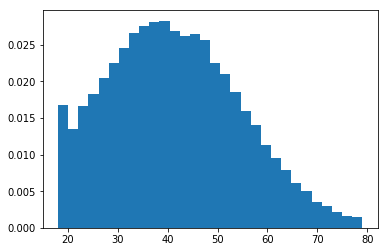

In [107]:
import matplotlib.pyplot as plt
import numpy as np
plt.hist(age, density=True, bins=30)
# 3 bins 20-35,35-50,50-80

In [108]:
labels =[1,2,3]
b_age=pd.cut(temp['age'], 3,labels=labels)
b_age
#from the histograms we can verify the age intervals here to be true

0         2
1         1
2         1
3         1
4         1
5         1
6         2
7         1
8         1
9         1
10        2
11        2
12        2
13        1
14        1
15        2
16        2
17        1
18        3
19        3
20        1
21        1
22        1
23        1
24        1
25        3
26        1
27        3
28        2
29        1
         ..
101070    2
101071    1
101072    1
101073    2
101074    2
101075    1
101076    1
101077    1
101078    1
101079    2
101080    2
101081    2
101082    1
101083    1
101084    1
101085    3
101086    1
101087    1
101088    1
101089    2
101090    2
101091    2
101092    3
101093    3
101094    2
101095    2
101096    2
101097    3
101098    2
101099    1
Name: age, Length: 101100, dtype: category
Categories (3, int64): [1 < 2 < 3]

In [0]:
temp["age"]=b_age

In [0]:
#df_x=temp.drop("age" , 1)
df_x=temp

In [111]:
df_x.head()

,loan_id,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number,loan_repaid,loan_purpose_business,loan_purpose_emergency_funds,loan_purpose_home,loan_purpose_investment,loan_purpose_other
0,289774,1,NaN,NaN,7700,0.49,3285.0,1073,0,0,2,3,NaN,1,0,0,0,0
1,482590,0,1.0,0.0,4500,1.02,636.0,5299,1,13500,1,1,NaN,0,0,0,1,0
2,135565,1,NaN,NaN,6900,0.82,2085.0,3422,1,24500,1,8,1.0,0,0,0,0,1
3,207797,0,1.0,0.0,1200,0.82,358.0,3388,0,0,1,1,NaN,0,0,0,1,0
4,828078,0,0.0,0.0,6900,0.80,2138.0,4282,1,18100,1,1,NaN,0,1,0,0,0


REPLACING NUL VALUES WITH -1

In [0]:
df_x.fully_repaid_previous_loans.replace(np.nan, -1, regex=True , inplace=True)

In [0]:
df_x.currently_repaying_other_loans.replace(np.nan, -1, regex=True , inplace=True)

In [0]:
df_x.avg_percentage_credit_card_limit_used_last_year.replace(np.nan, -1, regex=True , inplace=True)

In [0]:
df_x.loan_repaid.replace(np.nan, -1, regex=True , inplace=True)

In [116]:
df_x.isnull().any()

loan_id                                            False
is_first_loan                                      False
fully_repaid_previous_loans                        False
currently_repaying_other_loans                     False
total_credit_card_limit                            False
avg_percentage_credit_card_limit_used_last_year    False
saving_amount                                      False
checking_amount                                    False
is_employed                                        False
yearly_salary                                      False
age                                                False
dependent_number                                   False
loan_repaid                                        False
loan_purpose_business                              False
loan_purpose_emergency_funds                       False
loan_purpose_home                                  False
loan_purpose_investment                            False
loan_purpose_other             

In [117]:
df_x.loan_repaid.value_counts()

-1.0    53446
 1.0    30706
 0.0    16948
Name: loan_repaid, dtype: int64

SEPARATING DATA :

1 PEOPLE WHO DIDN'T GET LOAD 

2 PEOPLE WHO GOT LOAN 

In [0]:
later_test=df_x.loc[df_x['loan_repaid'] == -1]

In [119]:
later_test.shape

(53446, 18)

In [0]:
sample_data=df_x.loc[(df_x['loan_repaid'] == 1) | (df_x['loan_repaid'] == 0 )]

In [121]:
sample_data.shape

(47654, 18)

In [0]:
loan_id= later_test.iloc[:, 0]

In [123]:
loan_id.head()

0    289774
1    482590
3    207797
4    828078
6    568977
Name: loan_id, dtype: int64

In [0]:
sample_data= sample_data.drop("loan_id" , 1)

In [0]:
later_test = later_test.drop('loan_id' , 1)

In [0]:
df_y = sample_data.iloc[:, 11]

In [127]:
df_y.head()

2    1.0
5    1.0
7    0.0
8    1.0
9    1.0
Name: loan_repaid, dtype: float64

In [0]:
df_x = sample_data.drop('loan_repaid' , 1)

In [129]:
df_x.head()

,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number,loan_purpose_business,loan_purpose_emergency_funds,loan_purpose_home,loan_purpose_investment,loan_purpose_other
2,1,-1.0,-1.0,6900,0.82,2085.00,3422,1,24500,1,8,0,0,0,0,1
5,1,-1.0,-1.0,6100,0.53,4751.05,5298,1,29500,1,1,0,0,0,0,1
7,1,-1.0,-1.0,4000,0.57,602.00,2757,1,31700,1,8,1,0,0,0,0
8,0,1.0,0.0,7000,0.52,2575.00,2917,1,53300,1,3,0,1,0,0,0
9,0,1.0,0.0,4300,0.83,722.00,892,1,5400,1,7,1,0,0,0,0


In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.3)

In [131]:
model_1= GradientBoostingClassifier(n_estimators = 300, learning_rate = 0.08, max_depth = 5, random_state = 0)
model_1.fit(x_train, y_train)
print('Train:')
print (300, 0.08, 5, model_1.score(x_train,y_train))
print('Test:')
print (300, 0.08, 5, model_1.score(x_test,y_test))
print('model made')

Train:
300 0.08 5 0.948316695146446
Test:
300 0.08 5 0.9247394558298944
model made


In [0]:
from sklearn.metrics import classification_report, confusion_matrix  ,accuracy_score
y_pred = model_1.predict(x_test) 

In [133]:
accuracy_score(y_test, y_pred)

0.9247394558298944

In [134]:
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

[[4613  427]
 [ 649 8608]]
              precision    recall  f1-score   support

         0.0       0.88      0.92      0.90      5040
         1.0       0.95      0.93      0.94      9257

    accuracy                           0.92     14297
   macro avg       0.91      0.92      0.92     14297
weighted avg       0.93      0.92      0.93     14297



CALCULATING FEATURE IMPORTANCE

In [135]:
featureimp = list (zip(df_x.columns, model_1.feature_importances_))
featureimp.sort(key=lambda x: x[1], reverse = True)
featureimp

[('saving_amount', 0.4367980103403008),
 ('checking_amount', 0.33089003075949736),
 ('yearly_salary', 0.10625843362039829),
 ('total_credit_card_limit', 0.06841251364151783),
 ('currently_repaying_other_loans', 0.023507974029059533),
 ('avg_percentage_credit_card_limit_used_last_year', 0.012342545969427772),
 ('is_employed', 0.007429285499218225),
 ('dependent_number', 0.004250924226417874),
 ('loan_purpose_emergency_funds', 0.0028216476024121077),
 ('fully_repaid_previous_loans', 0.0016295709734352915),
 ('is_first_loan', 0.0015459154792517367),
 ('loan_purpose_other', 0.0014592300897717262),
 ('loan_purpose_investment', 0.0009071391132364411),
 ('age', 0.0008450230624141593),
 ('loan_purpose_business', 0.0005360918767016469),
 ('loan_purpose_home', 0.00036566371693928985)]

CORRELATION BETWEEN FEATURES 

HIGHER THE SAVING AMOUNT , MORE LIKELY THE LOAN IS REPAID. 

In [136]:
sample_data.corr()

,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,dependent_number,loan_repaid,loan_purpose_business,loan_purpose_emergency_funds,loan_purpose_home,loan_purpose_investment,loan_purpose_other
is_first_loan,1.000000,-0.978266,-0.901884,0.004244,0.001190,0.009829,0.011345,-0.000380,-0.002678,-0.005861,0.012824,0.006942,-0.013316,0.003613,0.002527,-0.001679
fully_repaid_previous_loans,-0.978266,1.000000,0.880856,0.000473,0.001136,-0.007460,-0.008146,0.000750,0.003686,0.005888,-0.007093,-0.007659,0.012689,-0.003685,0.000597,-0.000414
currently_repaying_other_loans,-0.901884,0.880856,1.000000,-0.062559,0.000018,-0.085794,-0.085542,-0.044795,-0.060855,0.027246,-0.157397,-0.018867,0.033983,-0.004459,-0.013751,0.008472
total_credit_card_limit,0.004244,0.000473,-0.062559,1.000000,0.229357,0.206914,0.213970,0.160570,0.191317,-0.059595,0.407777,0.043577,-0.057239,-0.000298,0.033131,-0.030538
avg_percentage_credit_card_limit_used_last_year,0.001190,0.001136,0.000018,0.229357,1.000000,0.003229,0.000242,0.104286,0.046948,-0.002015,-0.007944,-0.009697,0.003926,-0.010819,0.011810,0.006645
saving_amount,0.009829,-0.007460,-0.085794,0.206914,0.003229,1.000000,0.260910,0.155793,0.221132,-0.067361,0.518534,0.045038,-0.078837,0.012160,0.045826,-0.039820
checking_amount,0.011345,-0.008146,-0.085542,0.213970,0.000242,0.260910,1.000000,0.157319,0.218754,-0.073799,0.513363,0.041641,-0.074291,0.013007,0.043094,-0.038355
is_employed,-0.000380,0.000750,-0.044795,0.160570,0.104286,0.155793,0.157319,1.000000,0.591256,-0.042867,0.305749,0.025119,-0.040674,0.009598,0.034891,-0.040120
yearly_salary,-0.002678,0.003686,-0.060855,0.191317,0.046948,0.221132,0.218754,0.591256,1.000000,-0.063607,0.429771,0.039462,-0.059411,0.008241,0.037305,-0.038716
dependent_number,-0.005861,0.005888,0.027246,-0.059595,-0.002015,-0.067361,-0.073799,-0.042867,-0.063607,1.000000,-0.136384,-0.003657,0.011459,-0.015922,-0.005931,0.018753


In [0]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=20, random_state=0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [138]:
accuracy_score(y_test, y_pred)

0.9194936000559558

In [139]:
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[4598  442]
 [ 709 8548]]
              precision    recall  f1-score   support

         0.0       0.87      0.91      0.89      5040
         1.0       0.95      0.92      0.94      9257

    accuracy                           0.92     14297
   macro avg       0.91      0.92      0.91     14297
weighted avg       0.92      0.92      0.92     14297



In [0]:
actual_x_pred= later_test.drop('loan_repaid' , 1)

In [0]:
actual_y_pred = model_1.predict(actual_x_pred)

In [142]:
actual_y_pred

array([1., 1., 0., ..., 1., 0., 0.])

In [0]:
later_test['pred_loan_repaid'] = actual_y_pred

In [144]:
later_test.head()

,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number,loan_repaid,loan_purpose_business,loan_purpose_emergency_funds,loan_purpose_home,loan_purpose_investment,loan_purpose_other,pred_loan_repaid
0,1,-1.0,-1.0,7700,0.49,3285.0,1073,0,0,2,3,-1.0,1,0,0,0,0,1.0
1,0,1.0,0.0,4500,1.02,636.0,5299,1,13500,1,1,-1.0,0,0,0,1,0,1.0
3,0,1.0,0.0,1200,0.82,358.0,3388,0,0,1,1,-1.0,0,0,0,1,0,0.0
4,0,0.0,0.0,6900,0.80,2138.0,4282,1,18100,1,1,-1.0,0,1,0,0,0,1.0
6,1,-1.0,-1.0,600,0.89,305.0,1456,0,0,2,2,-1.0,0,1,0,0,0,0.0


In [145]:
loan_id.head()

0    289774
1    482590
3    207797
4    828078
6    568977
Name: loan_id, dtype: int64

In [0]:
later_test = pd.merge(later_test,loan_id, left_index=True, right_index=True)

In [147]:
later_test.head()

,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number,loan_repaid,loan_purpose_business,loan_purpose_emergency_funds,loan_purpose_home,loan_purpose_investment,loan_purpose_other,pred_loan_repaid,loan_id
0,1,-1.0,-1.0,7700,0.49,3285.0,1073,0,0,2,3,-1.0,1,0,0,0,0,1.0,289774
1,0,1.0,0.0,4500,1.02,636.0,5299,1,13500,1,1,-1.0,0,0,0,1,0,1.0,482590
3,0,1.0,0.0,1200,0.82,358.0,3388,0,0,1,1,-1.0,0,0,0,1,0,0.0,207797
4,0,0.0,0.0,6900,0.80,2138.0,4282,1,18100,1,1,-1.0,0,1,0,0,0,1.0,828078
6,1,-1.0,-1.0,600,0.89,305.0,1456,0,0,2,2,-1.0,0,1,0,0,0,0.0,568977


In [0]:
later_test.to_csv("pred_final_data.csv")

In [0]:
final_cust=later_test['loan_id'].loc[(later_test['pred_loan_repaid'] == 1.0)]


In [0]:
final_cust=pd.DataFrame(list(final_cust))
final_cust.to_csv("final_loan_id.csv")